![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 2: Logistic Regression EXERCISE

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_2/Session_2_Logistic_Regression_EXERCISE.ipynb)

**Resources:**
* Sklearn documentation

# Logistic Regression Assignment

We are given a dataset of  direct marketing campaigns of a credit institution. **Our goal is to implement a model to predict whether the client will subscribe to a term deposit.**

**When working on the assignment there could be multiple ways to explore data or implement specific analysis. Choose that one you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**


### Enjoy!

DATASET DESCRIPTION

- age (numeric)
- job : type of job 
- marital : marital status
- education 
- default: has credit in default? 
- housing: has housing loan? 
- loan: has personal loan? 
- contact: contact communication type 
- month: last contact month of year 
- day_of_week: last contact day of the week 
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client 
- pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign 
- emp.var.rate: employment variation rate 
- cons.price.idx: consumer price index 
- cons.conf.idx: consumer confidence index 
- euribor3m: euribor 3 month rate 
- nr.employed: number of employees 
- y — Target variable: has the client subscribed a term deposit? 

##### Import libraries

In [61]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=18)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [62]:
data = pd.read_csv('banking.csv')
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1


In [63]:
data.shape

(41188, 21)

## EDA and Feature Engineering 

An important requirement for Logistic Regression to function properly is Feature Engineering as it helps to identify independent variables. Without proper identification of independent variables Logistic Regression fails to perform correctly.

One disadvantage of logistic regression is that it doesn’t handle large number of categorical variables well.

```education``` column has many categories, try to reduce the categories for a better modelling. The education column has the following categories.


In [64]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We will group all ```basic.XX``` in a unique value ```basic```

Model doesn't work will with many numbers of categorical variables as these categorical vavriables have to be encoded into dummy variables for instance where we will need to add many new features to our dataset.

In [65]:
# Put your code here
data.loc[data['education'].str.contains('basic'), 'education'] = 'basic.xx'
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.xx,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.xx,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.xx,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


##### Analyse the distribution of the target variable

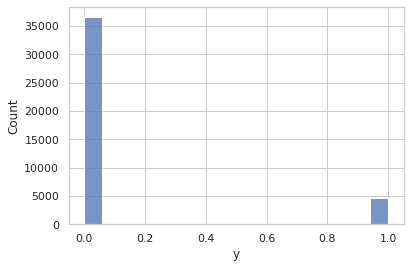

In [66]:
# Put your code here

sns.histplot(data['y'])

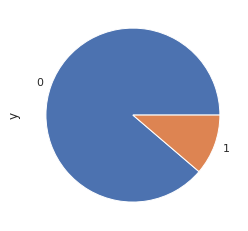

In [67]:
data["y"].value_counts().plot.pie()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


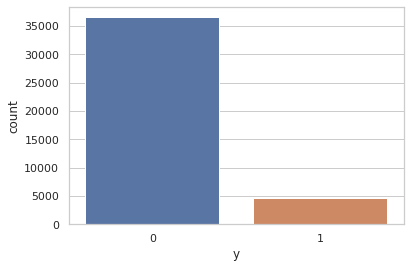

In [68]:
sns.countplot('y', data=data)

In [69]:
# Put your code here
data['count'] = 1
df_freq = data[['y', 'count']]
df_freq['y'] = df_freq['y'].apply(str)
df_freq = df_freq.groupby("y").sum()
df_freq

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,count
y,
0,36548
1,4640


In [70]:
df_freq = df_freq.reset_index()

In [71]:
df_freq['freq'] = round(df_freq['count']/df_freq['count'].sum(), 2)
df_freq

,y,count,freq
0,0,36548,0.89
1,1,4640,0.11


##### What can we observe about the distribution of the target variable

Reply here...

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

##### Observe how the different numeric variables behave for the 2 classes

In [73]:
# Put your code here

df_numeric = data.select_dtypes(include=['int', 'float'])
df_numeric['y'] = df_numeric['y'].apply(str)
df_numeric.groupby('y').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,count
y,,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,1.0
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,1.0


Observations:
- Age is clodr to the same for positive and negatives instances of y
- A greater duration of last call appears correlated in determining a positive y
- As pdays increases it appears to lead to greater instances of a negative y
- The mean fir campaign is greater for instances of y = 0 which is interesting, I would of thought the opposite to be true

##### Analyse other variables - Make some plots and discuss them

- **Job title**

In [74]:
# Put your code here
df_job = data[['job', 'y', 'count']]
df_job = df_job.groupby(['job', 'y']).agg({'count':'count'})
df_job

count
job           y       
admin.        0   9070
              1   1352
blue-collar   0   8616
              1    638
entrepreneur  0   1332
              1    124
housemaid     0    954
              1    106
management    0   2596
              1    328
retired       0   1286
              1    434
self-employed 0   1272
              1    149
services      0   3646
              1    323
student       0    600
              1    275
technician    0   6013
              1    730
unemployed    0    870
              1    144
unknown       0    293
              1     37

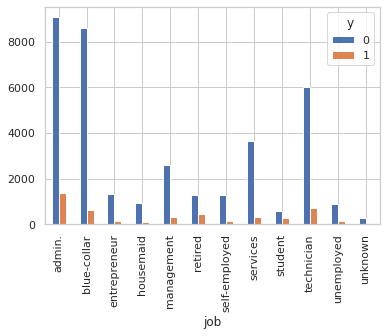

In [75]:
df_job_ct = data[["job", "y"]]
df_job2 = pd.crosstab(df_job_ct['job'],df_job_ct['y'])
df_job2.plot.bar()

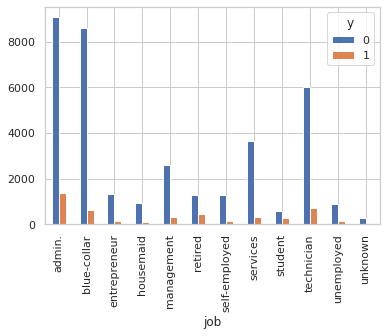

In [76]:
table = pd.pivot_table(df_job, values='count', index=['job'],
                    columns=['y'])
table.plot.bar()

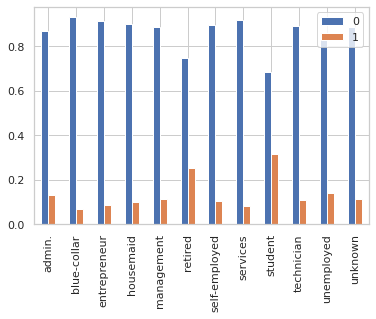

In [77]:
# Put your code here

df_jobf = data[['job','y']]
job_1 = df_jobf.groupby('job').y.sum()/df_jobf.job.value_counts() 
job_0 = 1 - job_1
df_jobff = pd.DataFrame({"0":job_0, '1':job_1})
df_jobff.plot.bar()
plt.legend(loc='upper right')

- Subscribing to loans ( y = 1 ) appears to be relatively greater then not for students, which makes sense for taking out loans for college, but also for those who are retired, which I wouldn't have suspected.

- May be more likely to take out loans for investment purposes, or perhaps the data is biased?

- **Marital status**

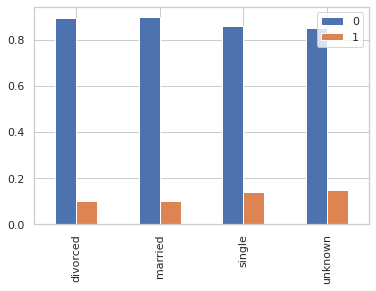

In [78]:
# Put your code here

df_marital = data[['marital','y']]
marital_1 = df_marital.groupby('marital').y.sum()/df_marital.marital.value_counts() 
marital_0 = 1 - marital_1
df_marital_f = pd.DataFrame({"0":marital_0, '1':marital_1})
df_marital_f.plot.bar()
plt.legend(loc='upper right')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

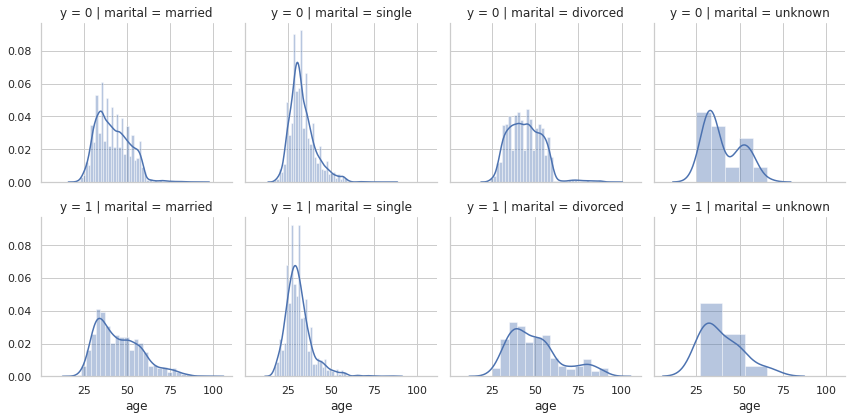

In [79]:
g = sns.FacetGrid(data, row='y', col='marital')
g.map(sns.distplot, 'age')
plt.show()

- For positivie instances among those who are divorced, the age range is skewed to the right, in comparison to negatice instances.

- **Education**

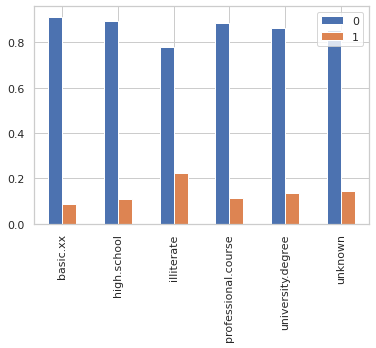

In [80]:
# Put your code here

df_education = data[['education', 'y']]
education_1 = df_education.groupby('education').y.sum()/df_education.education.value_counts()
education_0 = 1 - education_1
df_edu_freq = pd.DataFrame({'0':education_0, "1":education_1})
df_edu_freq.plot.bar()

- Amongst those who are illeterate, people seem to have a higher frequency of applying for loans then not. This is surprising.


- **Day of Week**

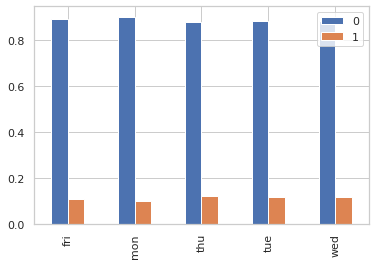

In [81]:
# Put your code here

df_dow = data[['day_of_week', 'y']]
dow_1 = df_dow.groupby("day_of_week").y.sum()/df_dow.day_of_week.value_counts()
dow_0 = 1 - dow_1
df_dow_f = pd.DataFrame({'0': dow_0, '1':dow_1})
df_dow_f.plot.bar()

- Nothing significant to note

- **Month**

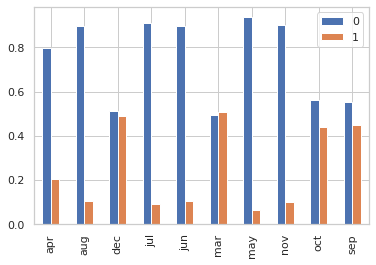

In [82]:
# Put your code here

df_month = data[['month', 'y']]
month_1 = df_month.groupby('month').y.sum()/df_month.month.value_counts()
month_0 = 1 - month_1
df_month_f = pd.DataFrame({'0':month_0, '1':month_1})
df_month_f.plot.bar()

- The months of March, September, October and December have a much higher frequency of postive instances which is interesting
- June, July, May and Nov have lower frequencies.
- I suspect this is due to the average families seasonal availability of money and time.

- **poutcome**

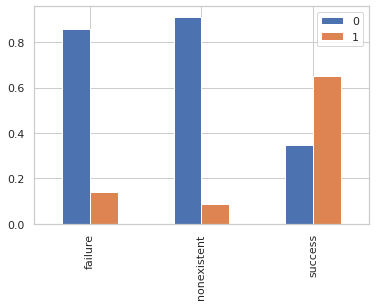

In [83]:
# Put your code here

df_p = data[['poutcome', 'y']]
p_1 = df_p.groupby("poutcome").y.sum()/df_p.poutcome.value_counts()
p_0 = 1 - p_1
df_pf = pd.DataFrame({'0':p_0, '1':p_1})
df_pf.plot.bar()

- Those who had a positive instance in the provious marketing campaign have a much higher positive frequency instance.

### Create dummy variables

We need to convert categorical variables into dummy/indicator variables otherwise our machine learning algorithm won't be able to directly take in those features as inputs!

In [102]:
# Put your code here
data = pd.read_csv('banking.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [103]:
# drop irrelevant variables

data = data.drop(['contact', 'day_of_week'], axis=1)
data

,age,job,marital,education,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,aug,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,nov,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,jun,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,apr,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,aug,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,jun,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,may,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,may,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,oct,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [104]:
type(data)

pandas.core.frame.DataFrame

In [105]:
data.shape

(41188, 19)

In [106]:
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome'])
data.head(3)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


### Implement the Logistic Regression Model

In [107]:
data.shape

(41188, 57)

##### Prepare the dataset for training

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


X = data.drop(['y'], axis=1)
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [109]:
log_reg = LogisticRegression()

log_model = log_reg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##### Compute predictions and accuracy using the accuracy score provided by the sklearn library

In [110]:
y_pred = log_model.predict(x_test)

##### An accuracy of **91%** looks quite a good result, but have a look more in detail observing the confusion matrix and other metrics you consider interesting.


##### EXPLAIN WHY ACCURACY IS NOT ENOUGH TO EVALUATE THE PERFORMANCE OF A CLASSIFIER AND WHY IT MIGHT FAIL IN CASE OF IMBALANCED DATASET


Accuracy is not enough to evaluate the performance of a classifier, because for example if our model has three classes, one, two and three - it may be very accurate in correctly predicting if something should be classified to class three, but very bad and predicting if something is to be classified to classes 2 & 3.

If are data is highly imbalanced, and for example most of our training datapoints should be classified are classified as 1, this will highly skew the accuracy of our model, and the overall accuracy of the model will be non-representitive.

Thus, we should look at other metrics such as precision and recall, and we should also evaluate them across classes, as we can do using a confusion matrix.






The confusion matrics gives an interesting overview of how well a model is doing and it is a great starting point for any classification model evaluation.

![](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

**Is our model obtaining good results or is it failing in some specific case?**

In [111]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[11664   370]
 [  926   633]]


##### Compute other metrics using classification report

In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12034
           1       0.63      0.41      0.49      1559

    accuracy                           0.90     13593
   macro avg       0.78      0.69      0.72     13593
weighted avg       0.89      0.90      0.90     13593



#### Remember:
    
**Precision:** percentage of your results which are relevant. Among all the elements that your model classify as positive, how many are really positive examples?

$\frac{TP}{TP+FP}$
                                            

**Recall:** percentage of total relevant results correctly classified by your algorithm.

$\frac{TP}{TP+FN}$                                            

In [114]:
print('Precision', 633/(633+370))

Precision 0.6311066799601196


In [115]:
print('Recall', 633/(633+926))

Recall 0.4060295060936498


## Imbalanced Classes

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.


##### Explain why imbalanced data can be a problem 

For example, you may have a 2-class (binary) classification problem with 100 instances (rows). A total of 80 instances are labeled with Class-1 and the remaining 20 instances are labeled with Class-2.

This is similar our current banking dataset where 89% of our dataset has a y label = 0, and only 11% has a y label = 1.

When we run our model it has an over all accuracy score of 91%, however, this is highly misleading, because when we look at the confusion matrix we can see the model has a very high precision and recall when classifying y = 0, however, it performs poorly at predicting when y = 1, with a precision of 64% and recall of 43%.

This is a major problem as the key variable we are trying to predict is when y = 1.

Possible Solutions to this problem would be:


*   Collect more data
*   Resampling techniques
*   Change performance metrics
*   Using a different algorithm
*   Using a penalized or regularized model










##### SMOTE

During the exploratory data analysis we have seen that we have **Imbalanced Classes**, i.e.,the percentage of negative examples is much higher with respect to the percentage of positiv examples. Indeed, observing the confusion matrix we saw that the implmented model face some problem in predict the positive examples (if a client will subscribe a term deposit).


To face this problem we will apply an over-sampling technique trying to balance our dataset generating **Synthetic Samples:** it consists in creating new synthetic points from the minority class to increase its cardinality.

we will use the **SMOTE** Algorithm [see here for more details](https://arxiv.org/pdf/1106.1813.pdf).

In order to apply SMOTE **install the imblearn python library** (if you already have it you do not need to reinstall):

[Follow this instructions](https://imbalanced-learn.readthedocs.io/en/stable/install.html)


### Now implent again the model following all the steps

Prepare the data

In [116]:
pip install smote

In [118]:
X = data.drop(['y'], axis=1)
y = data['y']

In [119]:
print("x_shape", X.shape)
print("y_shape", y.shape)

x_shape (41188, 56)
y_shape (41188,)


##### Apply SMOTE to generate synthetic data

In [134]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

# Create training and test set - test size:30% random_state=0
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

columns = x_train.columns

# Apply oversampling ONLY ON training data
os_data_X= x_train
os_data_y= y_train

os_data_X,os_data_y= os.fit_resample(os_data_X, os_data_y)


# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


length of oversampled data is  58506


IndexError: ignored

**Notice that we over-sampled only on the training data**

##### Check if the classes in the dataset now are balanced

In [148]:
# Put your code here
df_resampled = pd.DataFrame({'y':os_data_y})
df_resampled['count'] = 1
df_resampled['y'] = df_resampled["y"].apply(str)
df_resampled = df_resampled.groupby('y').sum()
df_resampled['freq'] = round(df_resampled['count']/df_resampled['count'].sum(), 2)
df_resampled

,count,freq
y,,
0,29253,0.5
1,29253,0.5


They are prefectly distributed!!

##### Implement the model

In [156]:
# Prepare thedata qith the oversampled dataset
X = os_data_X
y = os_data_y

# Create training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
logreg = LogisticRegression()

#Fit the model
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model Evaluation: evaluate the model and compare with previous implmentation/evaluation

In [157]:
#Compute predictions
y_pred = logreg.predict(X_test)

# score returns the mean accuracy on the given test data and labels.
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


The total accuracy decreases. Is our model obtaining poorer results? Have a deeper look analysing confusion matrix and classification report

In [158]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[4976,  844],
       [ 753, 5129]])

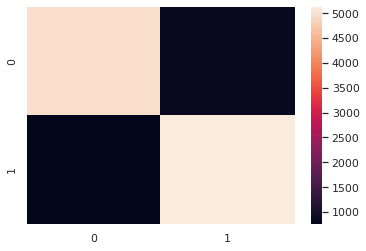

In [159]:
sns.heatmap(confusion_matrix(y_test, y_pred))

Analysing the confusion matriix we can observe that now our model is able to predict quite weel both positive and negative examples!! Let's see if this is also confirmed looking at precision and recall

In [160]:
#classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5820
           1       0.86      0.87      0.87      5882

    accuracy                           0.86     11702
   macro avg       0.86      0.86      0.86     11702
weighted avg       0.86      0.86      0.86     11702



The support is the number of occurrences of each class in y_test.



##### Discuss the obtained results!

Amazing the oversampling method using SMOTE worked very well. The overall accuracy of the model as seen in the classification report has dropped, but only slightly from 90% to 86%.

However, since we are now using a balanced datasetwe are getting a high accurracy, precision, recall and f-1 score across both positive and negative instances of y ( between 80% - 90% in all cases ), thus, our model is much better at predicting whether someone will subscribe to a term deposit.